## Setup
Install accompanying pinon library. It is better to install in dev mode in the conda environment with `pip install -e .` Jupyter server must restart to see changes to conda environment.
Auto reload the pinon module.  Other imports may be ignored for auto reload e.g.  `%aimport -simfin`. Note use of option 2 for auto reload and excluding other modules, rather than option 1 and including only reloadable modules.  This is because option 1 does not work correctly with aliased imports.

In [59]:
# !pip install -e ..

%load_ext autoreload
%autoreload 2
%aimport -pandas
%aimport -simfin
%aimport -os

%aimport pinon

%matplotlib inline

# imports
import pandas as pd
import seaborn as sns
import os

import pinon as pn
import pinon.names as pn_cols
import simfin as sf
import simfin.names as sf_cols  # column name shortcuts

config = pn.Config('master', 'V', 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Config file found at: /Users/daved/Dev/pinon/config/master.xlsx
Simfin data directory: /Users/daved/Dev/pinon/simfin_data
There is an error in the supplied ticker symbol EEFT in Company List of sheet: V of config file: /Users/daved/Dev/pinon/config/master.xlsx. Company uses non stardard quarterly reporting date not currently supported. Company was dropped from the list.
There is an error in the supplied ticker symbol PAGS in Company List of sheet: V of config file: /Users/daved/Dev/pinon/config/master.xlsx. Company was not found and was dropped from the list.


In [98]:
c = pn.Comps(config)
c.run_variations()

Adding breaking report for ticker V for report date 2023-03-31
Adding breaking report for ticker DFS for report date 2023-03-31


<AxesSubplot: xlabel='Date'>

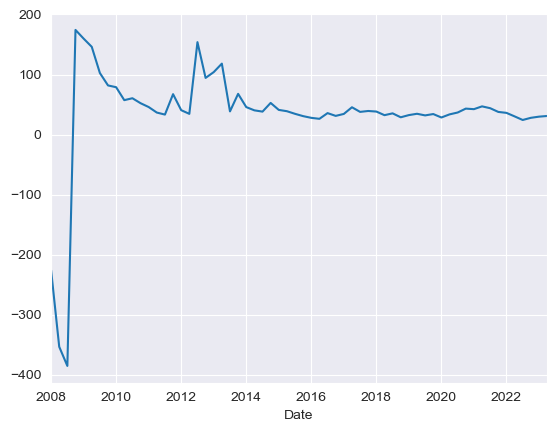

In [99]:
dp = pn.DailyPrices()
dp.get_downsampled_share_price_ratios('V')[sf_cols.PE_TTM].tail(70).plot()

<AxesSubplot: xlabel='Report Date'>

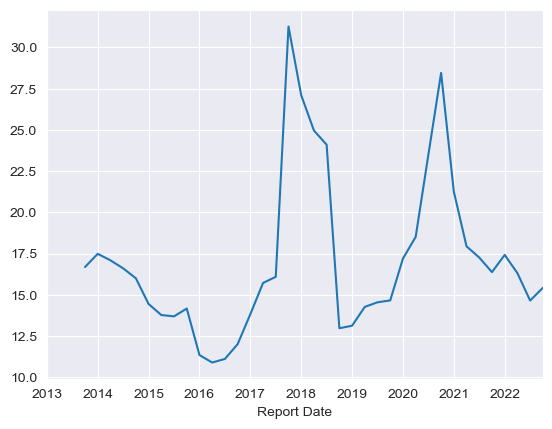

In [101]:
c.m.multiples.loc[('AXP',), pn_cols.TTM_PE_RATIO].plot()

In [88]:
c.m.multiples.loc[('V', '2009-12-31:2010-06-30')]

KeyError: '2009-12-31:2010-06-30'